In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Analyse et Exploration 

In [2]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
data = load_diabetes()

### Analyse de la forme

In [3]:
# Reformation du dataSet
df = pd.DataFrame(data.data)
tar = pd.DataFrame(data.target)

In [4]:
coList = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
for col,i in zip(coList,range(0,10)):
    df[col] = df[i]
mydata = pd.DataFrame(df,columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
mydata['target'] = tar
mydata.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
# nombres de ligne et de colonnes
mydata.shape

(442, 11)

In [99]:
mydatacopy = mydata.copy()

In [100]:
# nombre de variables
mydatacopy.dtypes.value_counts()

float64    11
dtype: int64

In [101]:
# Voyons s'il y a des variables manquantes
plt.figure(figsize=(20,12))
mydatacopy.isna().value_counts()

age    sex    bmi    bp     s1     s2     s3     s4     s5     s6     target
False  False  False  False  False  False  False  False  False  False  False     442
dtype: int64

<Figure size 1440x864 with 0 Axes>

### Analyse du fond

#### Visualisation de la target

In [102]:
mydatacopy['target'].value_counts()

200.0    6
72.0     6
178.0    5
90.0     5
71.0     5
        ..
162.0    1
302.0    1
346.0    1
153.0    1
261.0    1
Name: target, Length: 214, dtype: int64

#### 2 - Signification des différentes variables

/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

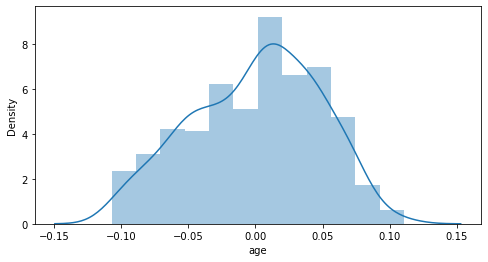

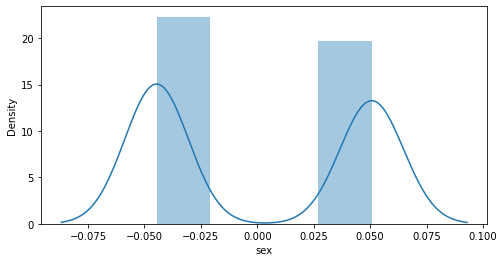

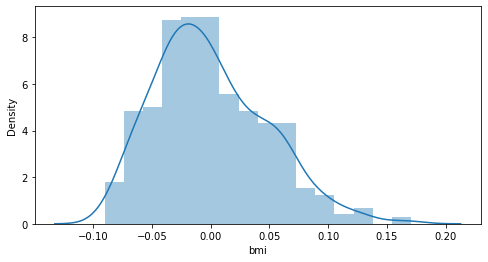

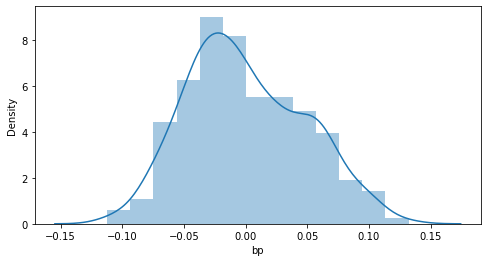

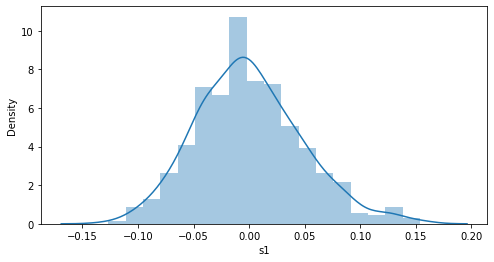

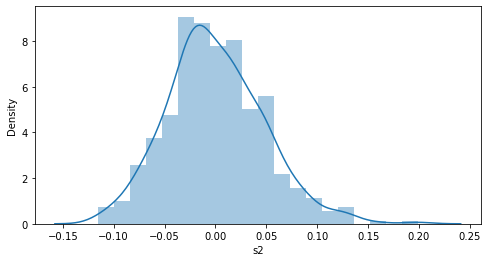

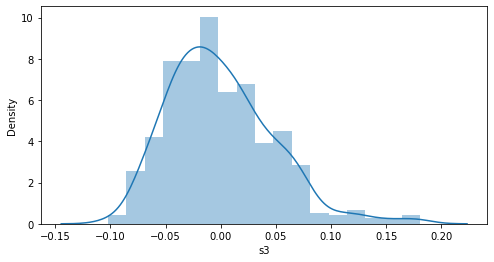

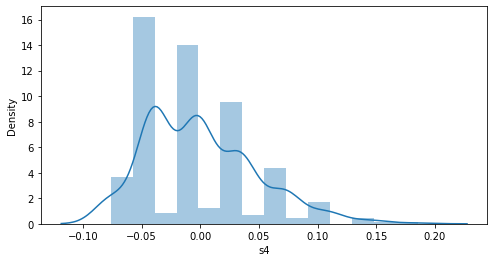

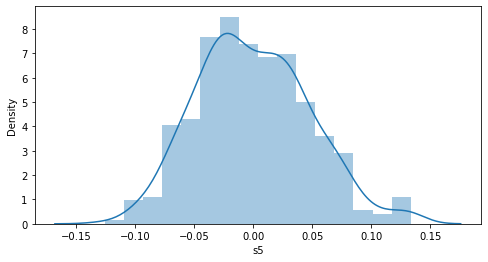

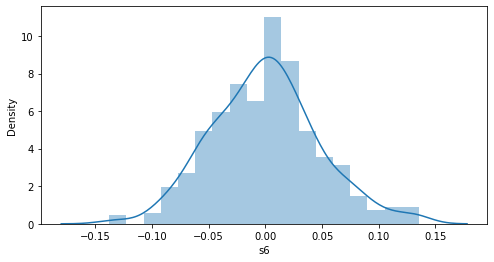

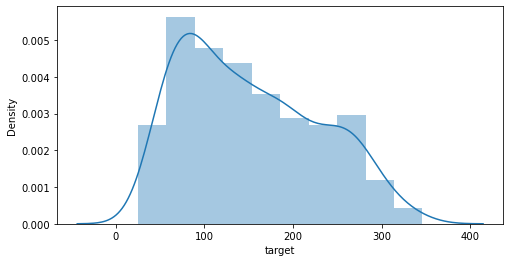

In [103]:
for col in mydatacopy.select_dtypes('float'):
    plt.figure(figsize=(8,4))
    sns.distplot(mydatacopy[col])

In [104]:
mydatacopy['sex'].unique()

array([ 0.05068012, -0.04464164])

##### 3 - Relation entre feature et target

In [105]:
# Fonction de personalisation des targets
def customTarget(mesure):
    if mesure['target'] < 60:
        return 60
    elif mesure['target'] > 60 and mesure['target']  < 110:
        return 80
    elif mesure['target'] > 126:
        return 110
    else:
        return 'inconnu'

In [106]:
mydatacopy['myTarget'] = mydatacopy.apply(customTarget,axis=1)

In [107]:
cl = [i for i in range(4,10)]
cl1 = [i for i in range(0,4)]
cl2 = [i for i in range(0,10)]
sanguin_col = mydatacopy.columns[cl]
autres_col = mydatacopy.columns[cl1]
toutes = mydatacopy.columns[cl2]
hypo = mydatacopy[mydatacopy['myTarget'] == 60]
normal = mydatacopy[mydatacopy['myTarget'] == 80]
hyper = mydatacopy[mydatacopy['myTarget'] == 110]


/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

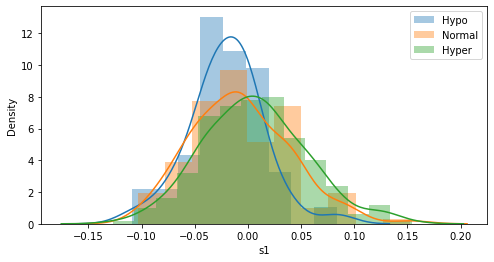

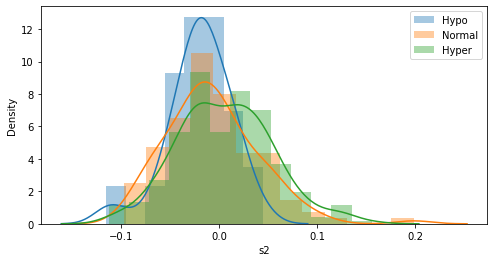

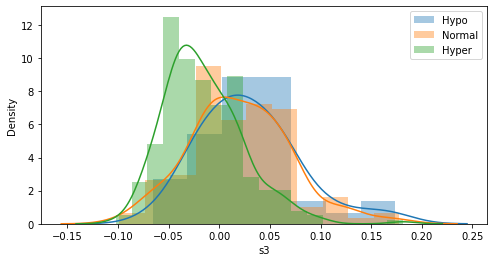

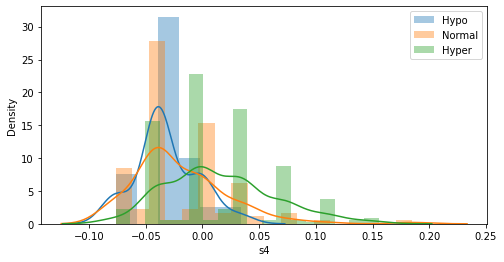

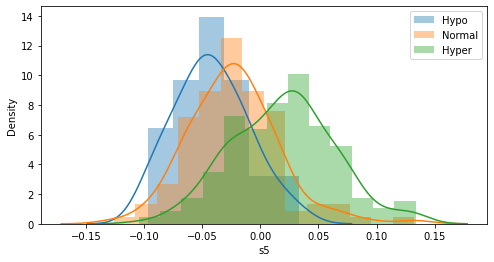

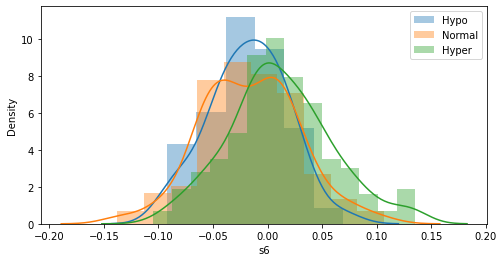

In [108]:
## Relation entre les tests sanguins et les résultats
for col in sanguin_col:
    plt.figure(figsize=(8,4))
    sns.distplot(hypo[col],label='Hypo')
    sns.distplot(normal[col],label='Normal')
    sns.distplot(hyper[col],label='Hyper')
    plt.legend()

/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ferdio/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

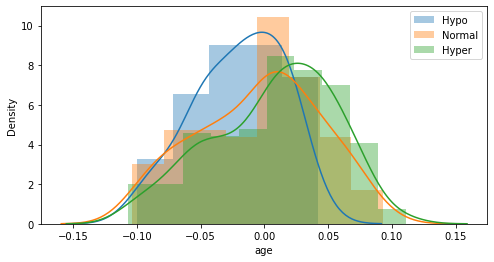

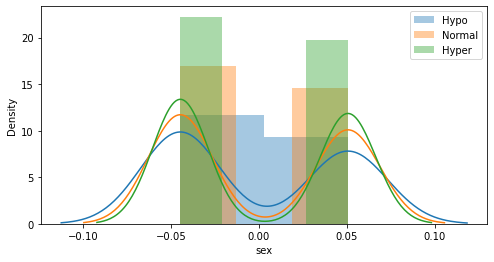

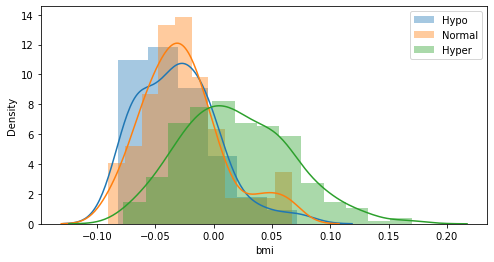

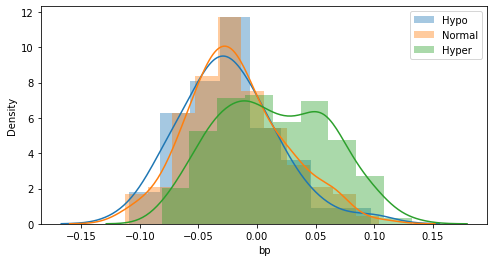

In [109]:
## Relation entre les autres variables et les résultats
for col in autres_col:
    plt.figure(figsize=(8,4))
    sns.distplot(hypo[col],label='Hypo')
    sns.distplot(normal[col],label='Normal')
    sns.distplot(hyper[col],label='Hyper')
    plt.legend()

## Analyse détaillé
### Relation variables/variables
#### sanguin/sanguin 

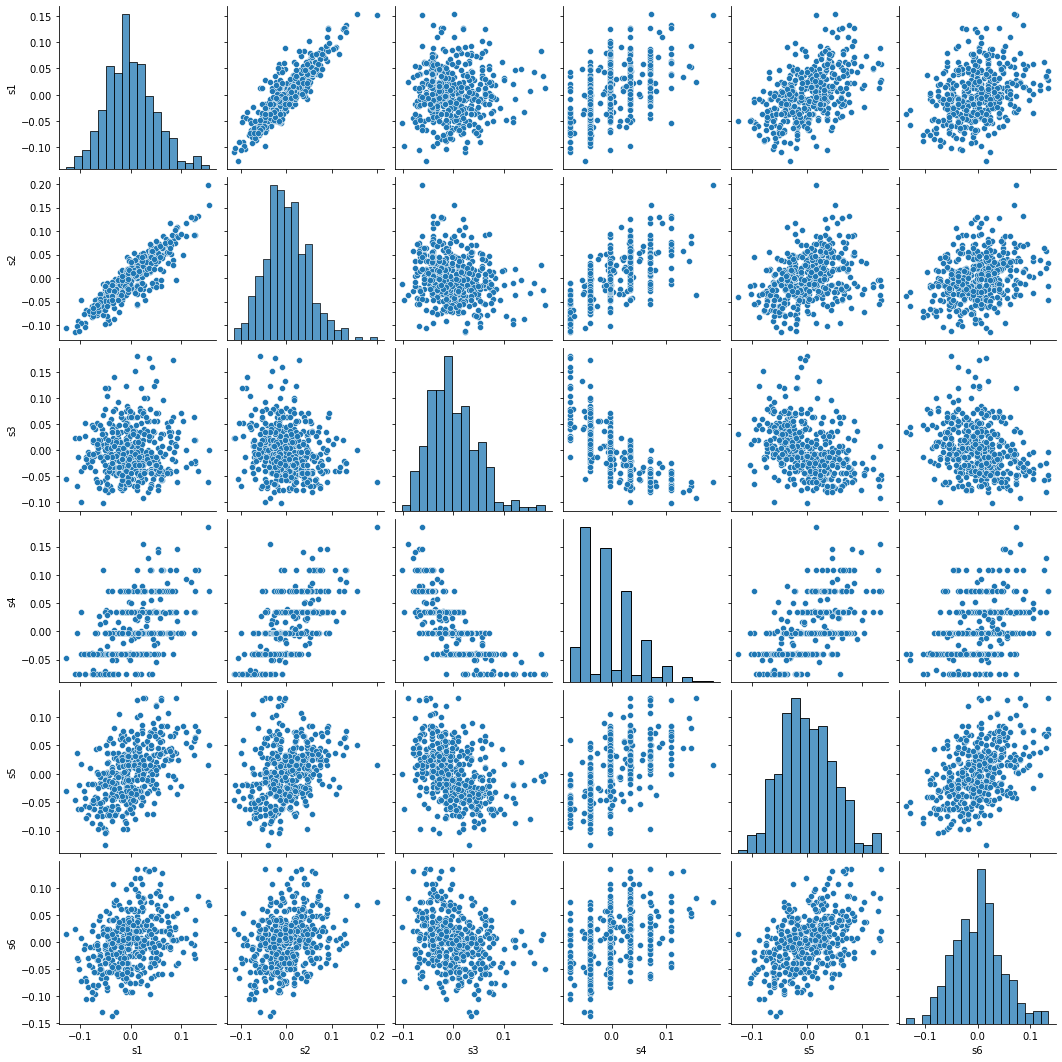

In [110]:
sns.pairplot(mydatacopy[sanguin_col])

<AxesSubplot:>

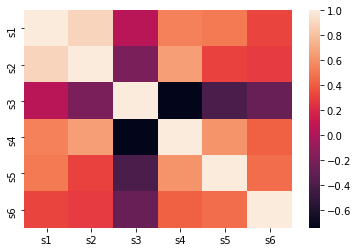

In [111]:
# Voyons rapidement la matrice de corrélation avec heatmap
sns.heatmap(mydatacopy[sanguin_col].corr())

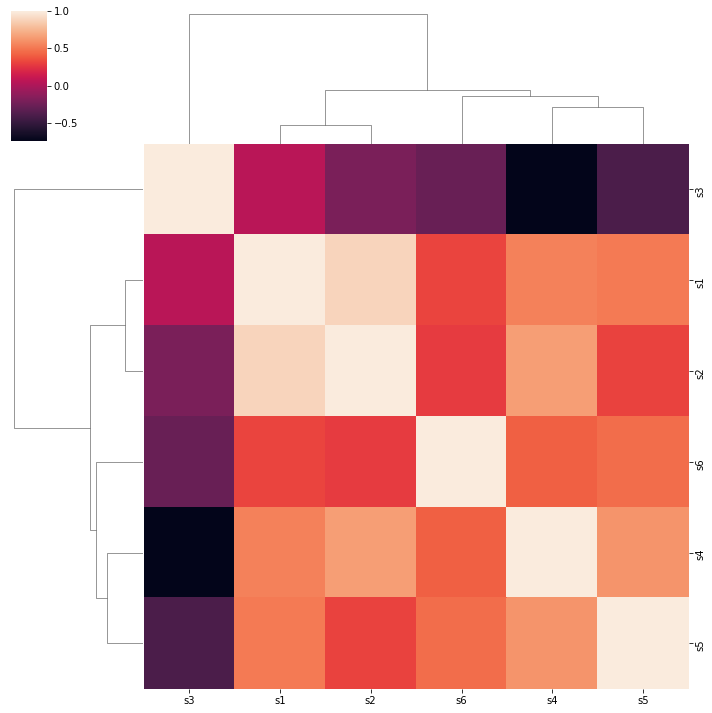

In [112]:
# ou avec clustermap
sns.clustermap(mydatacopy[sanguin_col].corr())

<Figure size 432x288 with 0 Axes>

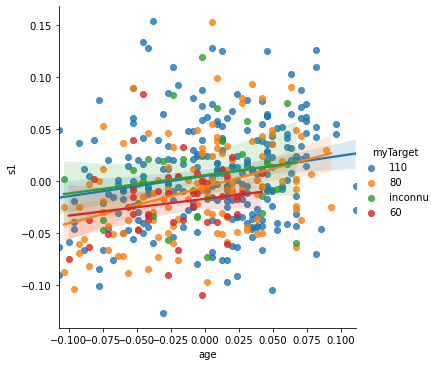

<Figure size 432x288 with 0 Axes>

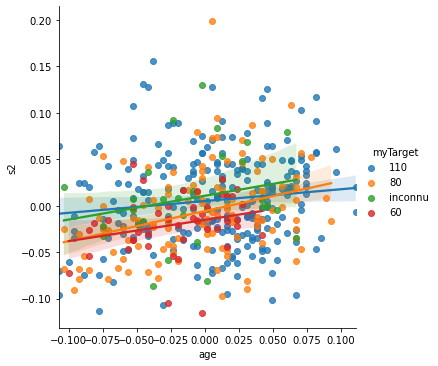

<Figure size 432x288 with 0 Axes>

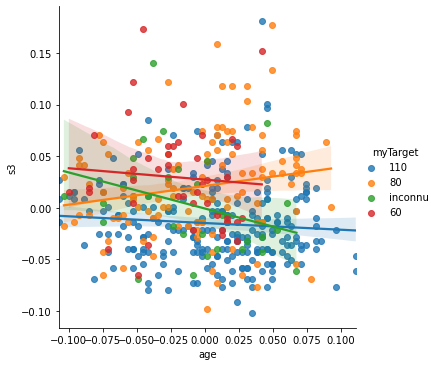

<Figure size 432x288 with 0 Axes>

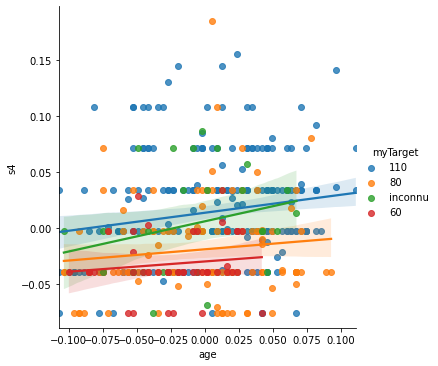

<Figure size 432x288 with 0 Axes>

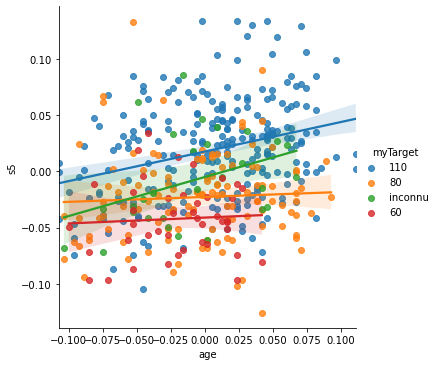

<Figure size 432x288 with 0 Axes>

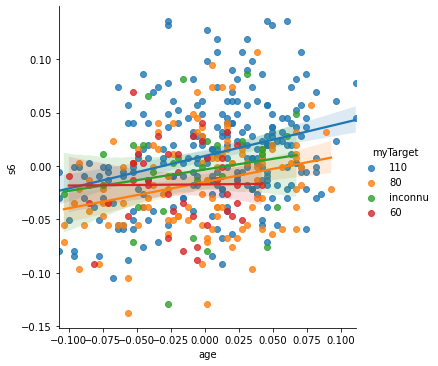

In [113]:
for col in sanguin_col:
    plt.figure()
    sns.lmplot(x='age',hue='myTarget', y=col, data=mydatacopy)

In [114]:
mydatacopy.corr()['age'].sort_values()

s3       -0.075181
sex       0.173737
bmi       0.185085
target    0.187889
s4        0.203841
s2        0.219243
s1        0.260061
s5        0.270777
s6        0.301731
bp        0.335427
age       1.000000
Name: age, dtype: float64

In [115]:
# Fonction de définition du statut de la personne 
def etat(mesure):
    if mesure['target'] < 60:
        return 'Hypo'
    elif mesure['target'] > 60 and mesure['target']  < 110:
        return 'Normal'
    elif mesure['target'] > 126:
        return 'Hyper'
    else:
        return 'inconnu'

In [116]:
mydatacopy['statut'] = mydatacopy.apply(etat,axis=1)

#### Preprocessing ( donnée presque déja traité)

#### Trainset,TestSet - Nettoyage - Encodage

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
trainset,testset = train_test_split(mydata,test_size=0.2)

In [119]:
def encodage(mydata):
    #Rien à encoder
    return 0
def imputation(mydata):
    #aucune valeur manquante
    return 0
    
def preprocessing(mydata):
#     encodage(mydata)
#     imputation(mydata)
    X = mydata.drop('target',axis=1)
    y = mydata['target']
    print(f'features : {X.shape}')
    print(f'Target : {y.shape}')
    return X,y
    

In [120]:
xTrain,yTrain = preprocessing(trainset)

features : (353, 10)
Target : (353,)


In [121]:
xTest,yTest = preprocessing(testset)

features : (89, 10)
Target : (89,)


#### Modelisation 

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

In [132]:
preprocessor = make_pipeline(StandardScaler(),SelectKBest(f_regression, k=10))
linear = make_pipeline(preprocessor,LinearRegression())
svm = make_pipeline(preprocessor,SVC())


In [133]:
listModels = {
    'lineaire':linear,
}

In [ ]:
for name , model in listModels.items():
    print(name)
    evaluation(model)

lineaire
 score du test : 0.5537098181302724


In [126]:
def evaluation(model):
    model.fit(xTrain,yTrain)
    yPred = model.predict(xTest)
    print(f' score du test : {model.score(xTest,yTest)}')
    
    N,trainScore,valScore = learning_curve(model,xTrain,yTrain,
                                           cv=4,train_sizes=np.linspace(0.1,1,10))  
    plt.figure(figsize=(12,8))
    plt.plot(N,trainScore.mean(axis=1),label='Train Score')
    plt.plot(N,valScore.mean(axis=1),label='Validation Score') 
    plt.legend()
    

### Observation génerale

In [127]:
mydatacopy = mydatacopy.drop(['target','myTarget'],axis=1)

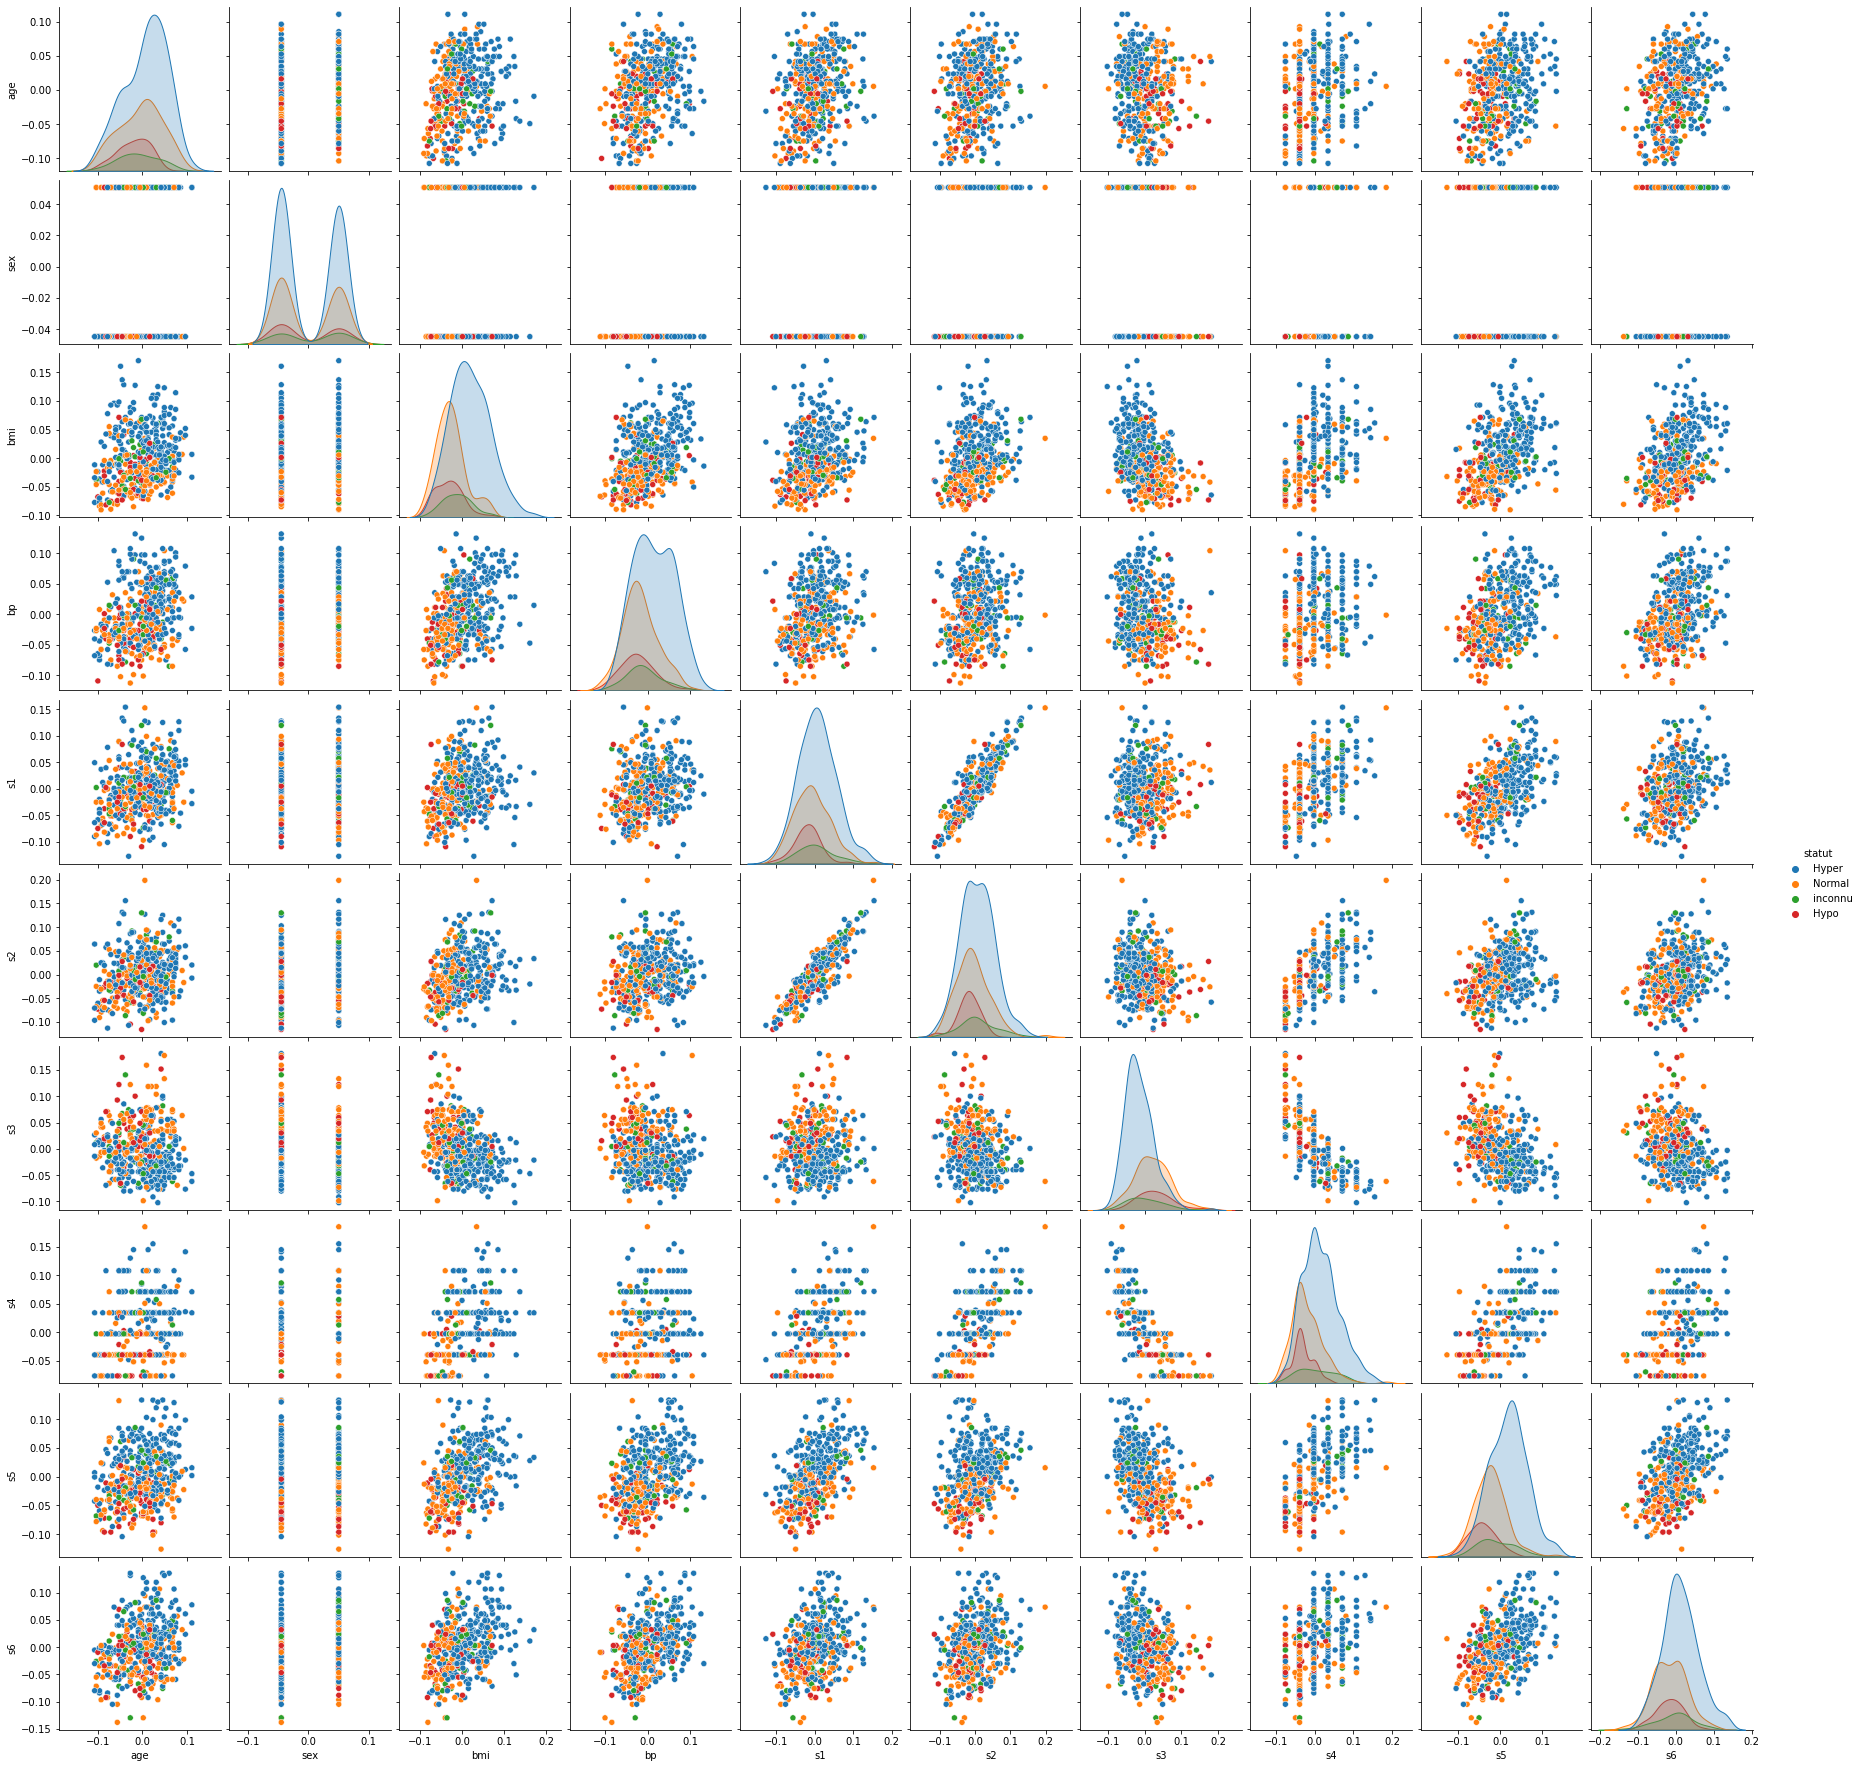

In [128]:
sns.pairplot(mydatacopy,hue='statut')

###  Analyse de la forme : Taf

- **Identification de la target** : nom : target
- **Nombres de lignes et de colonnes** : 442,11
- **Types de variables** : Que des variables quantitatives : 11
- **Identification des valeurs manquantes** : Pas de valeurs manquantes

###  Analyse du fond : Taf

- **Visualisation de la target (Histogramme : VC / Boxplot : VD)**
  - mesure quantitative de la progression de la maladie un an après la référence
  - plusieurs mésures
- **Compréhension des différentes variables (Internet)**
  - âge en années, sexe , indice de masse corporelle bmi , pression artérielle moyenne bp 
  - s1 tc, lymphocytes T (un type de globules blancs) 
  - s2 ldl, faible- lipoprotéines de densité 
  - s3 hdl, lipoprotéines de haute densité 
  - s4 tch, hormone stimulant la thyroïde 
  - s5 ltg, lamotrigine 
  - s6 glu, taux de sucre dans le sang 
  - Remarque: Chacune de ces 10 variables caractéristiques moyenne centrée et mise à l'échelle par la norme de viation fois n_samples (i.e. la somme des carrés de chaque colonne s'élève à 1) et s1-s6 sont tous des tests sanguins
  
- **Visualisation des relations features-target (Histogramme/Boxplot)**
  - target/blood : il semblerait que les gens en hypoglycémie aient un taux de s3(hdl,lipoprotéines de haute densité) différent et il semblerait que les gens en hyperglycémie aient un taux de s5(ltg, lamotrigine ) différent
    les taux de lamotrigine sont donc lié à une hausse de la mésure de diabète et les taux de  lipoprotéines de haute densité sont lié à une baisse de la mésure de diabète
  - target/age : Rien de special
  - target/sex : Rien de special
  - target/bmi : il semblerait que les gens en hyperglycémie aient un indice de masse corporelle bmi différent
     l'indice de masse corporelle bmi est lié à la hausse de la mésure de diabète
     A peut près pour le bp(discutable)
- **Identification des outliers**  
###  Analyse plus détaillée
- ** Relation variale/variable (sanguin/sanguin) : Certains variables sont très corrélés (s1,s2)(s1,s5)(s1,s4)
- ** Relation variale/variable (age/sanguin) : On obtient une faible corrélation(non négligeable) entre age et taux sanguin
- ** Relation variale/variable (maladie/sanguin) : le taux sanguin entre malade et covidien est diferent 


''DESCR': '.. _diabetes_dataset: \ n \ nDiabetes dataset \ n ---------------- \ n \ nDix variables de base, âge, sexe, indice de masse corporelle, sang moyen \ Une pression et six mesures de sérum sanguin ont été obtenues pour chacun des 442 patients diabétiques, ainsi que la réponse d'intérêt, une mesure quantitative de la progression de la maladie un an après la période de référence.  Caractéristiques de l'ensemble de données: Nombre d'instances: 442 : Nombre d'attributs: Les 10 premières colonnes sont des valeurs prédictives numériques : Cible: La colonne 11 est une mesure quantitative de la progression de la maladie un an après la référence : Informations sur les attributs: \ n - âge âge en années \ n - sexe \ n - indice de masse corporelle bmi \ n - pression artérielle moyenne bp \ n - s1 tc, lymphocytes T (un type de globules blancs) \ n - s2 ldl, faible- lipoprotéines de densité \ n - s3 hdl, lipoprotéines de haute densité \ n - s4 tch, hormone stimulant la thyroïde \ n - s5 ltg, lamotrigine \ n - s6 glu, taux de sucre dans le sang \ n \ nRemarque: Chacune de ces 10 variables caractéristiques moyenne centrée et mise à l'échelle par la norme de viation fois n_samples (i.e. la somme des carrés de chaque colonne s'élève à 1). \ n \ n URL source: \ nhttps: //www4.stat.ncsu.edu/~boos/var.select/diabetes.html \ n \ nPour plus d'informations, voir: \ nBradley Efron, Trevor Hastie, Iain Johnstone et Robert Tibshirani (2004) "Least Angle Regression", Annals of Statistics (avec discussion), 407-499. \ N (https://web.stanford.edu/~hastie/Papers/LARS /LeastAngle_2002.pdf) ',' feature_names ': [' age ',' sex ',' bmi ',' bp ',' s1 ',' s2 ',' s3 ',' s4 ',' s5 ',' s6 ']
,